# Module 1: Data Wrangling with Python
## Sprint 2: Data Processing with NumPy and Pandas
## Part 5: Top 50 Spotify Tracks of 2020


## About this Part

Congrats!
You completed almost all assignments and tasks of this Sprint.
You did a great job.
In this Part, you will need to prove all the skills that you learned.
As the final assignment of this Sprint, you will analyze the Top 50 Spotify Tracks 2020 dataset.
To complete this task, you will have to apply all that you have learned about Data Analysis, Linear Algebra, NumPy, and Pandas.

## Context

Imagine that you are a data analyst working for Spotify.
Your team is responsible for content analysis, and in this quarter, you have decided to analyze Spotify's top hits and quantify what makes a hit song.
Your team's product manager has many ideas and prepared a list of questions (requirements) that she wants you to get answers to.
After reviewing the list of over 20 questions, you are not in a good mood - you'll have to work a couple of days to get all the answers.
Luckily, a few days ago, an experienced data scientist working in your team queried the top 50 tracks for her machine learning project and agreed to share the data with you.
This is a significant help - your SQL skills are not too sharp yet, and you don't yet know where to find all the relevant tables in your data warehouse.
With this dataset, you are confident that you'll be able to answer all your PM's questions and maybe even look into some things that she didn't ask for.

## Objectives for this Part

- Practice working with data from Kaggle.
- Practice performing basic EDA.
- Practice reading data, performing queries and filtering data using Pandas.

## Requirements

- Download the data from [Spotify Top 50 Tracks of 2020 dataset](https://www.kaggle.com/atillacolak/top-50-spotify-tracks-2020).
- Load the data using Pandas.
- Perform data cleaning by:
  - Handling missing values.
  - Removing duplicate samples and features.
  - Treating the outliers.
- Perform exploratory data analysis. Your analysis should provide answers to these questions:
  - How many observations are there in this dataset?
  - How many features this dataset has?
  - Which of the features are categorical?
  - Which of the features are numeric?
  - Are there any artists that have more than 1 popular track? If yes, which and how many?
  - Who was the most popular artist?
  - How many artists in total have their songs in the top 50?
  - Are there any albums that have more than 1 popular track? If yes, which and how many?
  - How many albums in total have their songs in the top 50?
  - Which tracks have a danceability score above 0.7?
  - Which tracks have a danceability score below 0.4?
  - Which tracks have their loudness above -5?
  - Which tracks have their loudness below -8?
  - Which track is the longest?
  - Which track is the shortest?
  - Which genre is the most popular?
  - Which genres have just one song on the top 50?
  - How many genres in total are represented in the top 50?
  - Which features are strongly positively correlated?
  - Which features are strongly negatively correlated?
  - Which features are not correlated?
- How does the danceability score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- How does the loudness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- How does the acousticness score compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results you got, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Code quality. Was your code well-structured? Did you use the correct levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Sample Correction Questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What advantages do NumPy arrays have over Python lists?
- What makes computation on NumPy arrays so fast?
- What are the rules of broadcasting?
- What advantages do Pandas have over NumPy?
- What is a DataFrame in Pandas?


In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
drive.mount('/content/drive')
df_songs = pd.read_csv('/content/drive/MyDrive/py_files/data_sets/spotifytoptracks.csv', index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Checking if there are any NA values
df_songs.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

There are no NaN in any column.

In [5]:
# Checking the shape of df to compare it with the shape of df after removing duplicates
df_songs_shape = df_songs.shape

# Removing duplicate samples and features.
df_songs = df_songs.drop_duplicates()

# Checking the shape of df to see if it had changed after removing duplicates
df_songs.shape == df_songs_shape

True

Since the shape of dataset before and after removing duplicates is equal it is clear that it had no duplicates.

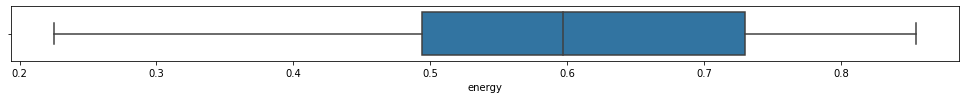

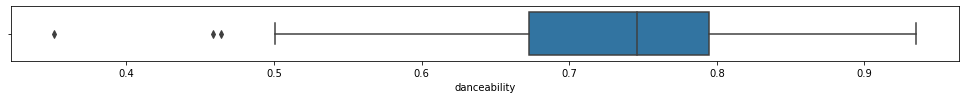

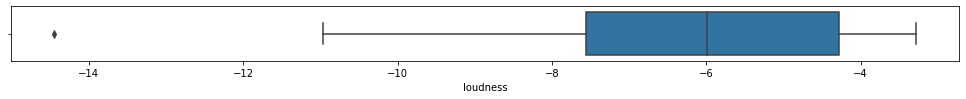

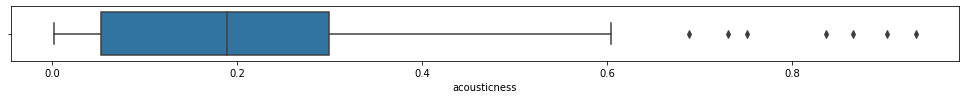

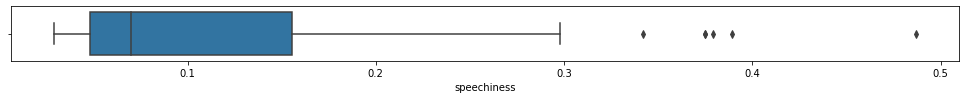

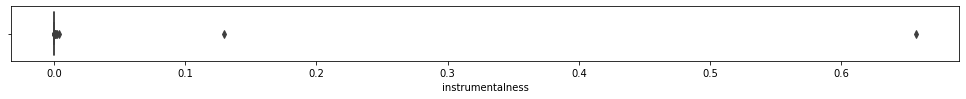

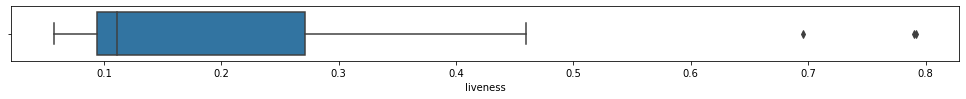

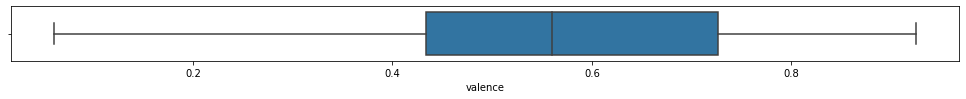

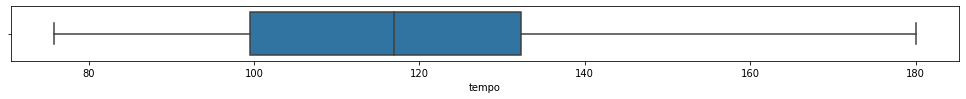

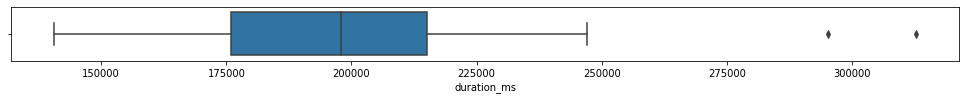

In [65]:
# Outliers
df_songs['key'] = df_songs['key'].astype("object")
df1=df_songs.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

Some of the numeric features have outliers that can be seen in boxplots. But since this is not a large dataset and every observation is a unique songs the outliers won't be removed or treated in some other way.

In [7]:
df_songs.head()

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.334,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco


In [8]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     object 
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(1), object(6)
memory usag

Here it can be seen that this dataset has 50 rows (observations) and 16 (features) columns.  
10 of those features are numeric (with dtype *float64* or *int64*) and 6 (with dtype *object*) are categorical.

Number of unique artists is 40 



[Text(0, 0.5, 'Number of songs'),
 Text(0.5, 0, 'Artist Name'),
 Text(0.5, 1.0, 'Number of songs per artist')]

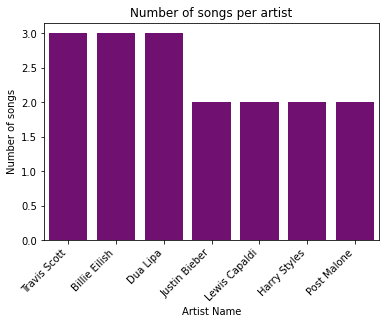

In [9]:
print(f"Number of unique artists is {df_songs['artist'].nunique()} \n")

most_popular_artists = pd.DataFrame(df_songs['artist'].value_counts()[df_songs['artist'].value_counts()>1]).reset_index(inplace=False).rename(columns={'index': 'artist', 'artist': 'count'})
plot = sns.barplot(data=most_popular_artists, x="artist", y="count", color="purple")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot.set(xlabel='Artist Name', ylabel='Number of songs', title='Number of songs per artist')

There are 40 artists that have their songs in the top 5. 7 of them have more that 1 popular track. Travis Scott, Billie Eilish and Dua Lipa have 3 most popular tracks each and other 4 artists have 2 each.

Number of unique albums is 45 



[Text(0, 0.5, 'Number of songs'),
 Text(0.5, 0, 'Album Name'),
 Text(0.5, 1.0, 'Number of songs per album')]

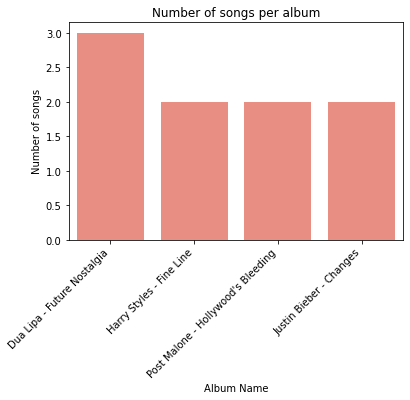

In [36]:
print(f"Number of unique albums is {df_songs['album'].nunique()} \n")
df_songs['artist_album'] = df_songs['artist'] + " - " + df_songs['album']
most_popular_albums = pd.DataFrame(df_songs['artist_album'].value_counts()[df_songs['artist_album'].value_counts()>1]).reset_index(inplace=False).rename(columns={'index': 'artist_album', 'artist_album': 'count'})
plot = sns.barplot(data=most_popular_albums, x="artist_album", y="count", color="salmon")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot.set(xlabel='Album Name', ylabel='Number of songs', title='Number of songs per album') 

There are total 45 albums with most popular songs in them. 4 of them have more that 1 popular track. *Future Nostalgia* (by Dua Lipa) has 3 tracks, *Fine Line* (Harry Styles), *Hollywood's Bleeding* (Post Malone) and *Changes* (Justin Bieber) has 2 tracks each

In [37]:
songs_dance_over_07 = pd.DataFrame(df_songs[df_songs.danceability > 0.7][['track_name', 'danceability']]).sort_values('danceability')
print(f'Number of songs with danceability more than 0.7: {len(songs_dance_over_07)} \n')
songs_dance_over_07

Number of songs with danceability more than 0.7: 32 



,track_name,danceability
26,bad guy,0.701
24,everything i wanted,0.704
42,THE SCOTTS,0.716
41,RITMO (Bad Boys For Life),0.723
7,death bed (coffee for your head),0.726
31,Break My Heart,0.730
32,Dynamite,0.746
5,ROCKSTAR (feat. Roddy Ricch),0.746
37,Sunflower - Spider-Man: Into the Spider-Verse,0.755
25,Señorita,0.759


In [38]:
songs_dance_under_04 = pd.DataFrame(df_songs[df_songs.danceability < 0.4][['track_name', 'danceability']])
print(f'Number of songs with danceability less than 0.4: {len(songs_dance_under_04)} \n')
songs_dance_under_04

Number of songs with danceability less than 0.4: 1 



,track_name,danceability
44,lovely (with Khalid),0.351


There are way more songs among the most popular ones with high danceability (32) than with low danceability (1).

In [39]:
songs_loud_over_minus5 = pd.DataFrame(df_songs[df_songs.loudness > -5][['track_name', 'loudness']]).sort_values('loudness')
print(f'Number of songs with loudness above -5 is {len(songs_loud_over_minus5)} \n')
songs_loud_over_minus5

Number of songs with loudness above -5 is 19 



,track_name,loudness
16,Before You Go,-4.858
33,Supalonely (feat. Gus Dapperton),-4.746
17,Say So,-4.577
4,Don't Start Now,-4.521
32,Dynamite,-4.410
37,Sunflower - Spider-Man: Into the Spider-Verse,-4.368
39,Ride It,-4.258
6,Watermelon Sugar,-4.209
43,Safaera,-4.074
35,Rain On Me (with Ariana Grande),-3.764


In [40]:
songs_loud_under_minus8 = pd.DataFrame(df_songs[df_songs.loudness < -8][['track_name', 'loudness']]).sort_values('loudness')
print(f'Number of songs with loudness below -8 is {len(songs_loud_under_minus8)} \n')
songs_loud_under_minus8

Number of songs with loudness below -8 is 9 



,track_name,loudness
24,everything i wanted,-14.454
26,bad guy,-10.965
44,lovely (with Khalid),-10.109
47,If the World Was Ending - feat. Julia Michaels,-10.086
15,Toosie Slide,-8.820
7,death bed (coffee for your head),-8.765
36,HIGHEST IN THE ROOM,-8.764
8,Falling,-8.756
20,Savage Love (Laxed - Siren Beat),-8.520


There are more songs among the most popular ones with higher loudness (19) than with lower loudness (9).

In [42]:
longest_song = df_songs[df_songs['duration_ms'] == df_songs['duration_ms'].max()][['artist', 'track_name', 'duration_ms']]
print(f'The longest track is {longest_song.iloc[0,1]} by {longest_song.iloc[0,0]} with duration {longest_song.iloc[0,2]} ms. \n')

shortest_song = df_songs[df_songs['duration_ms'] == df_songs['duration_ms'].min()][['artist', 'track_name', 'duration_ms']]
print(f'The shortest track is {shortest_song.iloc[0,1]} by {shortest_song.iloc[0,0]} with duration {shortest_song.iloc[0,2]} ms. \n')

The longest track is SICKO MODE by Travis Scott with duration 312820 ms. 

The shortest track is Mood (feat. iann dior) by 24kGoldn with duration 140526 ms. 

The most popular genre (with 14 songs) is Pop. 

Genres with only 1 song are Alternative/reggaeton/experimental, Chamber pop, Nu-disco, Pop/Soft Rock, Disco-pop, Pop rap, Dance-pop/Disco, Dreampop/Hip-Hop/R&B, R&B/Hip-Hop alternative, Hip-Hop/Trap 

Number of unique genres is 16.


[Text(0, 0.5, 'Number of songs'),
 Text(0.5, 0, 'Genre'),
 Text(0.5, 1.0, 'Number of songs per genre')]

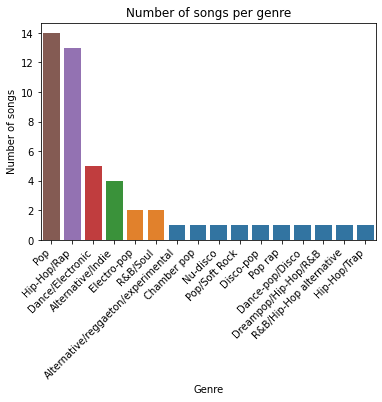

In [63]:
genres_popularity = pd.DataFrame(df_songs['genre'].value_counts()).reset_index(inplace=False).rename(columns={'index': 'genre', 'genre': 'count'})
plot = sns.barplot(x='genre', y='count', hue='count', data=genres_popularity, dodge=False)
plot.legend_.remove()
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plot.set(xlabel='Genre', ylabel='Number of songs', title='Number of songs per genre') 

In [64]:
most_popular_genre = df_songs['genre'].value_counts()[df_songs['genre'].value_counts() == df_songs['genre'].value_counts().max()]
print(f'The most popular genre (with {most_popular_genre[0]} songs) is {most_popular_genre.index[0]}. \n')

genres_1_song = df_songs['genre'].value_counts()[df_songs['genre'].value_counts() == 1]
print(f"Genres with only 1 song are {', '.join(genres_1_song.index.to_list())} \n")

print(f"Number of unique genres is {df_songs['genre'].nunique()}.")

The most popular genre (with 14 songs) is Pop. 

Genres with only 1 song are Alternative/reggaeton/experimental, Chamber pop, Nu-disco, Pop/Soft Rock, Disco-pop, Pop rap, Dance-pop/Disco, Dreampop/Hip-Hop/R&B, R&B/Hip-Hop alternative, Hip-Hop/Trap 

Number of unique genres is 16.


Text(0.5, 1.0, 'Correlation between numeric song features')

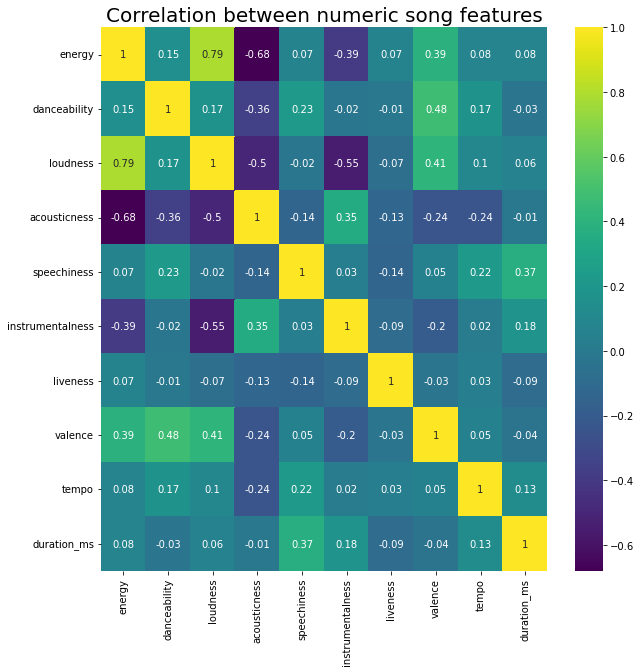

In [43]:
numeric_featurs = df_songs[['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
plt.figure(figsize=(10, 10))
sns.heatmap(round(numeric_featurs.corr(), 2), annot=True, cmap='viridis')
plt.title("Correlation between numeric song features", size=20)

This map show correlation between numeric features. Features that have the strongest positive correlation are yellow (energy and loudness). Features that have strongest negative correlation are purple (acousticness and energy, instrumentalness and loudness). Features that do not correlate are turquoise and have correlation coefficient closest to 0 (liveness and danceability, duration and acousticness).

The further analysis could include more songs (not only top 50) in order to check if there are any clear features that have the most impact on the popularity of the song. It could include some cluster analysis or preparing models.